In [16]:
import numpy as np
import pyfastchem 

import pyfastchem
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy import constants as const


#Do the chemistry calculations
#this loads the temperatures and pressures produced by petitRADTRANS, you may need to modify these lines if you store these data products somewhere else
temperatures = np.load('data_products/radtrans_temperature.npy')
pressures = np.load('data_products/radtrans_pressure.npy')

In [17]:
fastchem = pyfastchem.FastChem('/home/calder/Documents/FastChem/input/element_abundances/asplund_2020_extended.dat', 
                               '/home/calder/Documents/FastChem/input/logK/logK.dat', 
                               1)


FastChem initialisation summary:
  number of species: 575    elements: 80    molecules: 495    condensates: 0



In [18]:
input_data = pyfastchem.FastChemInput()
output_data = pyfastchem.FastChemOutput()

In [19]:
input_data.temperature = temperatures
input_data.pressure = pressures

In [20]:
fastchem_flag = fastchem.calcDensities(input_data, output_data)
print("FastChem reports:", pyfastchem.FASTCHEM_MSG[fastchem_flag])

FastChem reports: convergence ok


In [21]:
number_densities = np.array(output_data.number_densities)
gas_number_density = pressures*1e6 / (const.k_B.cgs * temperatures)

In [22]:
number_densities

array([[4.28550853e+07, 6.86026457e-02, 3.69056590e+04, ...,
        1.95432449e-17, 5.58015721e+02, 2.86384766e-14],
       [4.84049050e+07, 9.78044933e-02, 4.65826727e+04, ...,
        3.14704330e-17, 7.04225185e+02, 4.61099736e-14],
       [5.46914644e+07, 1.39478831e-01, 5.87953306e+04, ...,
        5.07088513e-17, 8.88701377e+02, 7.42859851e-14],
       ...,
       [1.84090386e+11, 5.01392320e+13, 9.76747962e+14, ...,
        8.61888279e+03, 1.92518021e-02, 1.64947145e+04],
       [2.04607654e+11, 5.36449172e+13, 1.23222241e+15, ...,
        1.12634033e+04, 2.22738442e-02, 2.31099119e+04],
       [2.27304678e+11, 5.74075335e+13, 1.55439476e+15, ...,
        1.46857330e+04, 2.59086572e-02, 3.23536913e+04]])

In [23]:
#change the below lines to select which species you want to calculate the volume mixing ratios for
# abundance_species_labels = ['CO', 'H2O', 'VO', 'OH', 'CO2', 'CH4', 'C2H2', 'NH3', 'HCN', 'Fe', 'Fe+', 'Cr', 'Si']
# abundance_species = ['C1O1', 'H2O1', 'O1V1', 'H1O1', 'C1O2', 'C1H4', 'C2H2', 'H3N1', 'C1H1N1_1', 'Fe', 'Fe1+', 'Cr', 'Si']

In [24]:
abundance_species = ['Al', 'B', 'Ba', 'Be', 'Ca', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'Ga', 'Ge', 'Hf', 'In', 'Ir', 'K', 'Li', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Ni', 'O', 'Os', 'Pb', 'Pd', 'Rb', 'Rh', 'Ru', 'Sc', 'Si', 'Sn', 'Sr', 'Ti', 'Tl', 'V', 'W', 'Y', 'Zn', 'Zr']
abundance_species_labels = ['Al', 'B', 'Ba', 'Be', 'Ca', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'Ga', 'Ge', 'Hf', 'In', 'Ir', 'K', 'Li', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Ni', 'O', 'Os', 'Pb', 'Pd', 'Rb', 'Rh', 'Ru', 'Sc', 'Si', 'Sn', 'Sr', 'Ti', 'Tl', 'V', 'W', 'Y', 'Zn', 'Zr']


In [25]:
#set the quench pressure to 1 bar
quench = np.argmin(np.abs(pressures-1e1))

In [26]:
a_index = []
abundance_species_indices, abundance_species_masses_ordered = [], []
n_species = fastchem.getElementNumber()

In [27]:
for i, species in enumerate(abundance_species):
    index = fastchem.getGasSpeciesIndex(species)
    if index != pyfastchem.FASTCHEM_UNKNOWN_SPECIES:
        abundance_species_indices.append(index) 
        #abundance_species_masses_ordered.append(fastchem.getSpeciesMolecularWeight(index))
        this_species = number_densities[quench, index]/gas_number_density[quench]
        print("The VMR for ",species,' is ', this_species)
    else:
        print("Species", species, "to plot not found in FastChem")

The VMR for  Al  is  6.284450120736337e-07 erg / K
The VMR for  B  is  8.601920308199416e-10 erg / K
The VMR for  Ba  is  3.195916432382493e-10 erg / K
The VMR for  Be  is  4.117137911265462e-11 erg / K
The VMR for  Ca  is  2.4587155473819153e-06 erg / K
The VMR for  Co  is  1.4948340961688448e-07 erg / K
The VMR for  Cr  is  7.079592959038503e-07 erg / K
The VMR for  Cs  is  2.0634569602091076e-11 erg / K
The VMR for  Cu  is  2.063093447370899e-08 erg / K
The VMR for  Fe  is  4.946571802411902e-05 erg / K
The VMR for  Ga  is  1.7971958817835836e-09 erg / K
The VMR for  Ge  is  7.154765674272624e-09 erg / K
The VMR for  Hf  is  1.2150535391184618e-11 erg / K
The VMR for  In  is  1.0829176066220596e-11 erg / K
The VMR for  Ir  is  3.585877215540056e-11 erg / K
The VMR for  K  is  1.9642279376167866e-07 erg / K
The VMR for  Li  is  1.565292177052519e-11 erg / K
The VMR for  Mg  is  6.081422083824978e-05 erg / K
The VMR for  Mn  is  2.3059703152266368e-07 erg / K
The VMR for  Mo  is  1.30

In [28]:
help(fastchem.getGasSpeciesIndex)

Help on method getGasSpeciesIndex in module pyfastchem:

getGasSpeciesIndex(...) method of pyfastchem.FastChem instance
    getGasSpeciesIndex(self: pyfastchem.FastChem, arg0: str) -> int



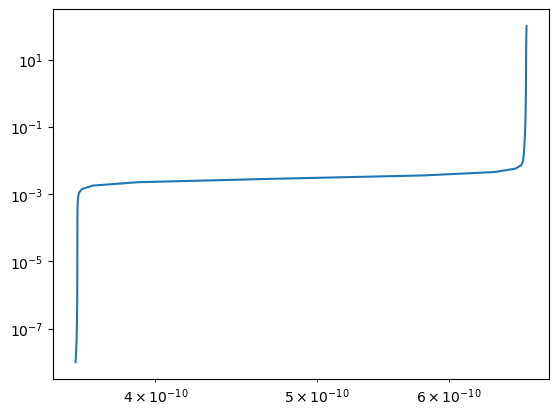

In [29]:
plot_species = ['Fe', 'Fe+', 'Na', 'Ni', 'Ca', 'Co', 'V I']
#for the plot labels, we therefore use separate strings in the usual notation
plot_species_labels = ['Fe I', 'Fe II', 'Na I', 'Ni I', 'Ca I', 'Co I', 'V I']
plot_species_cond = ['Fe(s,l)', 'Fe+(s,l)', 'Na(s,l)', 'Ni(s,l)', 'Ca(s,l)', 'Co(s,l)']


plt.plot(number_densities[:, index]/gas_number_density[:],pressures)
plt.xscale('log')
plt.yscale('log')